# Import all the required libraries

---



In [1]:
import pandas as pd
import datetime as dt
from datetime import date
import matplotlib.pyplot as plt
import yfinance as yf
import numpy as np
import tensorflow as tf

# Define start day to fetch the dataset from the yahoo finance library

---



In [9]:


START = "2019-01-01"
TODAY = date.today().strftime("%Y-%m-%d")

# Define a function to load the dataset

def load_data(ticker):
    data = yf.download(ticker, START, TODAY)
    data.reset_index(inplace=True)
    return data

In [10]:
data = load_data('AAPL')
df=data
df.head()

[*********************100%%**********************]  1 of 1 completed


,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-01-02,38.722500,39.712502,38.557499,39.480000,37.793793,148158800
1,2019-01-03,35.994999,36.430000,35.500000,35.547501,34.029236,365248800
2,2019-01-04,36.132500,37.137501,35.950001,37.064999,35.481926,234428400
3,2019-01-07,37.174999,37.207500,36.474998,36.982498,35.402950,219111200
4,2019-01-08,37.389999,37.955002,37.130001,37.687500,36.077835,164101200


In [11]:
df = df.drop(['Date', 'Adj Close'], axis = 1)
df.head()

,Open,High,Low,Close,Volume
0,38.722500,39.712502,38.557499,39.480000,148158800
1,35.994999,36.430000,35.500000,35.547501,365248800
2,36.132500,37.137501,35.950001,37.064999,234428400
3,37.174999,37.207500,36.474998,36.982498,219111200
4,37.389999,37.955002,37.130001,37.687500,164101200


Visualizing Closing Price

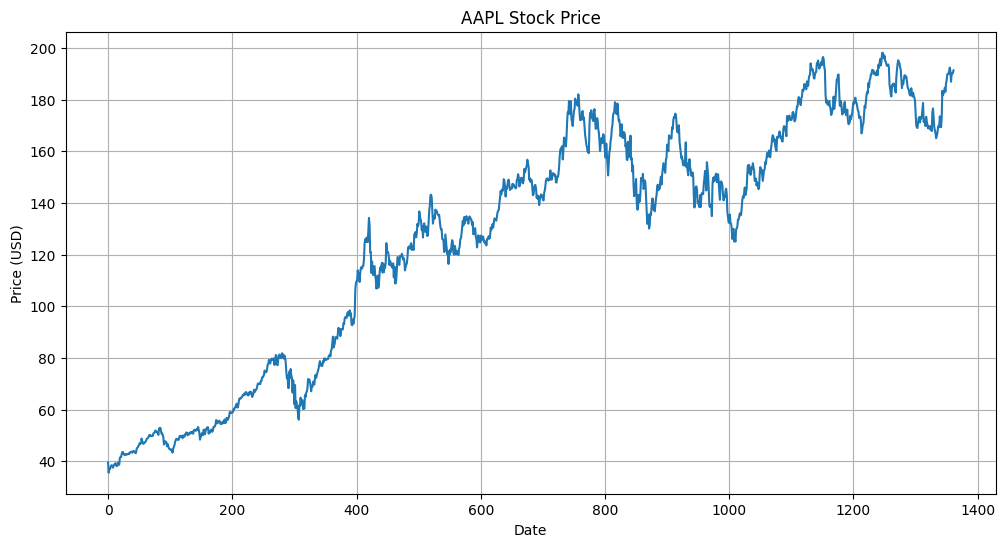

In [12]:
plt.figure(figsize=(12, 6))
plt.plot(df['Close'])
plt.title("AAPL Stock Price")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.grid(True)
plt.show()

In [13]:
df

,Open,High,Low,Close,Volume
0,38.722500,39.712502,38.557499,39.480000,148158800
1,35.994999,36.430000,35.500000,35.547501,365248800
2,36.132500,37.137501,35.950001,37.064999,234428400
3,37.174999,37.207500,36.474998,36.982498,219111200
4,37.389999,37.955002,37.130001,37.687500,164101200
...,...,...,...,...,...
1357,190.979996,191.000000,186.630005,186.880005,51005900
1358,188.820007,190.580002,188.039993,189.979996,36294600
1359,191.509995,193.000000,189.100006,189.990005,52280100
1360,189.610001,192.250000,189.509995,190.289993,53068000


# Plotting moving averages of 100 day

---



In [14]:
ma100 = df.Close.rolling(100).mean()
ma100

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
1357    179.674400
1358    179.717800
1359    179.775200
1360    179.858999
1361    179.960099
Name: Close, Length: 1362, dtype: float64

Text(0.5, 1.0, 'Graph Of Moving Averages Of 100 Days')

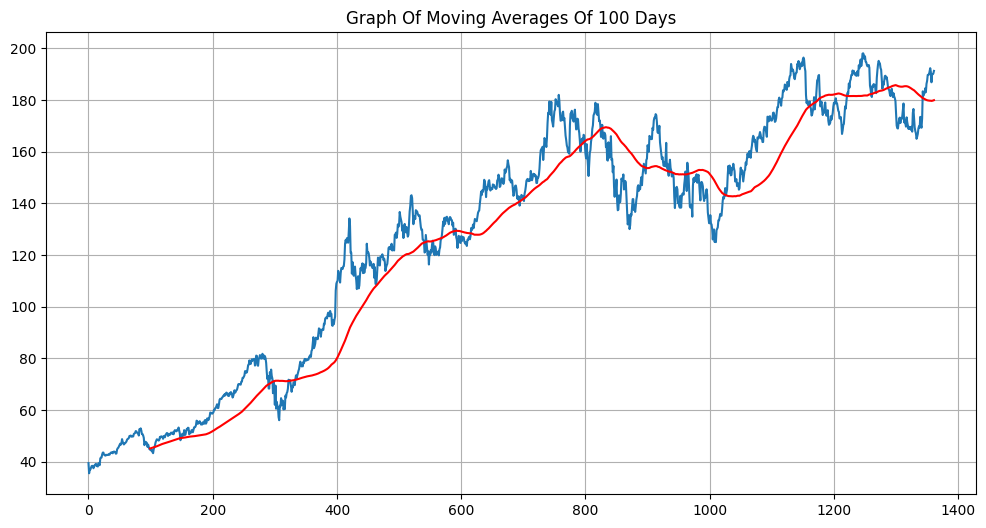

In [15]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.grid(True)
plt.title('Graph Of Moving Averages Of 100 Days')

# Defining 200 days moving averages and plotting comparision graph with 100 days moving averages

---



In [16]:
ma200 = df.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
1357    180.92385
1358    180.98280
1359    181.04290
1360    181.10540
1361    181.16455
Name: Close, Length: 1362, dtype: float64

Text(0.5, 1.0, 'Comparision Of 100 Days And 200 Days Moving Averages')

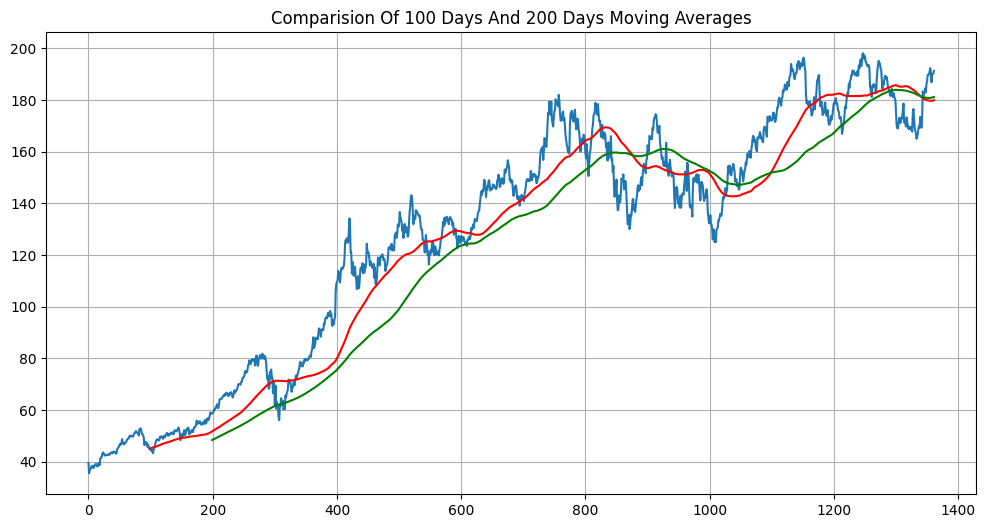

In [17]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')
plt.grid(True)
plt.title('Comparision Of 100 Days And 200 Days Moving Averages')

In [18]:
df.shape

(1362, 5)

# Spliting the dataset into training (70%) and testing (30%) set

In [19]:
# Splitting data into training and testing

train = pd.DataFrame(data[0:int(len(data)*0.70)])
test = pd.DataFrame(data[int(len(data)*0.70): int(len(data))])

print(train.shape)
print(test.shape)

(953, 7)
(409, 7)


In [20]:
train.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-01-02,38.722500,39.712502,38.557499,39.480000,37.793793,148158800
1,2019-01-03,35.994999,36.430000,35.500000,35.547501,34.029236,365248800
2,2019-01-04,36.132500,37.137501,35.950001,37.064999,35.481926,234428400
3,2019-01-07,37.174999,37.207500,36.474998,36.982498,35.402950,219111200
4,2019-01-08,37.389999,37.955002,37.130001,37.687500,36.077835,164101200


In [21]:
test.head()

,Date,Open,High,Low,Close,Adj Close,Volume
953,2022-10-13,134.990005,143.589996,134.369995,142.990005,141.586761,113224000
954,2022-10-14,144.309998,144.520004,138.190002,138.380005,137.022003,88598000
955,2022-10-17,141.070007,142.899994,140.270004,142.410004,141.012466,85250900
956,2022-10-18,145.490005,146.699997,140.610001,143.750000,142.339310,99136600
957,2022-10-19,141.690002,144.949997,141.500000,143.860001,142.448227,61758300


# Using MinMax scaler for normalization of the dataset

---



In [22]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [23]:
train_close = train.iloc[:, 4:5].values
test_close = test.iloc[:, 4:5].values

In [24]:
data_training_array = scaler.fit_transform(train_close)
data_training_array

array([[0.02684987],
       [0.        ],
       [0.010361  ],
       [0.00979771],
       [0.01461125],
       [0.01898096],
       [0.01981736],
       [0.01723989],
       [0.01333105],
       [0.01857132],
       [0.02176325],
       [0.02333362],
       [0.02497227],
       [0.0189639 ],
       [0.02002218],
       [0.01793974],
       [0.02657676],
       [0.02408467],
       [0.02131943],
       [0.03936161],
       [0.04139285],
       [0.04152941],
       [0.04960314],
       [0.05460441],
       [0.05470684],
       [0.049074  ],
       [0.04816933],
       [0.04649653],
       [0.04898865],
       [0.04777672],
       [0.04883503],
       [0.04818639],
       [0.04905691],
       [0.05093454],
       [0.04927882],
       [0.05253905],
       [0.05468976],
       [0.05486046],
       [0.05578219],
       [0.05284628],
       [0.05595289],
       [0.05745499],
       [0.05690876],
       [0.05518478],
       [0.05173679],
       [0.05243663],
       [0.06266108],
       [0.066

In [25]:
x_train = []
y_train = [] 

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train) 

In [26]:
x_train.shape

(853, 100, 1)

# ML Model (LSTM)

---



In [27]:
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.models import Sequential

In [28]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences=True
              ,input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))


model.add(LSTM(units = 60, activation = 'relu', return_sequences=True))
model.add(Dropout(0.3))


model.add(LSTM(units = 80, activation = 'relu', return_sequences=True))
model.add(Dropout(0.4))


model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

c:\Users\AI\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [29]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape              ┃    Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)           │     10,400 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout (Dropout)               │ (None, 100, 50)           │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 60)           │     26,640 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 60)           │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ lstm_2 (LSTM)                   │ (None, 100, 80)           │     45,120 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout_2 (Dropout)             │ (None, 100, 80)           │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ lstm_3 (LSTM)                   │ (None, 120)               │     96,480 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout_3 (Dropout)             │ (None, 120)               │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense (Dense)                   │ (None, 1)                 │        121 │
└─────────────────────────────────┴───────────────────────────┴────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

# Training the model

---



In [30]:
import tensorflow as tf
model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics=[tf.keras.metrics.MeanAbsoluteError()])
model.fit(x_train, y_train,epochs = 10)

Epoch 1/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 19s 183ms/step - loss: 0.2173 - mean_absolute_error: 0.3781
Epoch 2/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 5s 190ms/step - loss: 0.0271 - mean_absolute_error: 0.1337
Epoch 3/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 5s 177ms/step - loss: 0.0185 - mean_absolute_error: 0.1039
Epoch 4/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 5s 184ms/step - loss: 0.0135 - mean_absolute_error: 0.0892
Epoch 5/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 5s 179ms/step - loss: 0.0111 - mean_absolute_error: 0.0809
Epoch 6/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 5s 187ms/step - loss: 0.0123 - mean_absolute_error: 0.0842
Epoch 7/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 5s 182ms/step - loss: 0.0111 - mean_absolute_error: 0.0783
Epoch 8/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 5s 186ms/step - loss: 0.0119 - mean_absolute_error: 0.0807
Epoch 9/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 5s 182ms/step - loss: 0.0111 - mean_absolute_error: 0.0788
Epoch 10/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 6s 205ms/step - loss: 0.0100 - mean_absolute_error: 0.0745


In [31]:
model.save('keras_model.h5')

c:\Users\AI\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\models\model.py:342: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  warnings.warn(


In [32]:
test_close.shape

(409, 1)

In [33]:
past_100_days = pd.DataFrame(train_close[-100:])

In [34]:
test_df = pd.DataFrame(test_close)

**Defining the final dataset for testing by including last 100 coloums of the training dataset to get the prediction from the 1st column of the testing dataset.**

---


In [35]:
final_df = pd.concat([past_100_days, test_df], ignore_index=True)


In [36]:
final_df.head()

,0
0,137.589996
1,143.110001
2,140.360001
3,140.520004
4,143.779999


In [37]:
input_data = scaler.fit_transform(final_df)
input_data

array([[1.71979737e-01],
       [2.47503119e-01],
       [2.09878275e-01],
       [2.12067407e-01],
       [2.56669874e-01],
       [3.36845005e-01],
       [3.25899554e-01],
       [3.24121067e-01],
       [3.58325471e-01],
       [2.78560776e-01],
       [2.88958840e-01],
       [3.24121067e-01],
       [3.13859746e-01],
       [2.41072675e-01],
       [1.65686244e-01],
       [9.38569964e-02],
       [1.05896805e-01],
       [1.42427083e-01],
       [6.89560903e-02],
       [8.94787325e-02],
       [1.48447091e-01],
       [1.41332725e-01],
       [1.81283444e-01],
       [2.27664607e-01],
       [2.27664607e-01],
       [1.69927557e-01],
       [1.94417818e-01],
       [1.60076672e-01],
       [1.90313248e-01],
       [2.26296347e-01],
       [2.44903551e-01],
       [2.91832102e-01],
       [3.01272342e-01],
       [2.71582944e-01],
       [2.85127963e-01],
       [2.80065778e-01],
       [3.20837369e-01],
       [3.44096322e-01],
       [3.01682987e-01],
       [3.55452209e-01],


In [38]:
input_data.shape

(509, 1)

# Testing the model

---



In [39]:
x_test = []
y_test = []
for i in range(100, input_data.shape[0]):
   x_test.append(input_data[i-100: i])
   y_test.append(input_data[i, 0])

In [40]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(409, 100, 1)
(409,)


# Making prediction and plotting the graph of predicted vs actual values

---



In [41]:
# Making predictions

y_pred = model.predict(x_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 190ms/step


In [42]:
y_pred.shape

(409, 1)

In [43]:
y_test

array([2.45861375e-01, 1.82788446e-01, 2.37925928e-01, 2.56259438e-01,
       2.57764440e-01, 2.51333996e-01, 3.04419297e-01, 3.34245437e-01,
       3.73785719e-01, 3.32877386e-01, 2.70625330e-01, 4.20303833e-01,
       3.87467481e-01, 3.50663509e-01, 2.73772076e-01, 1.89629327e-01,
       1.82788446e-01, 1.90176505e-01, 1.98111952e-01, 1.34765330e-01,
       2.98946467e-01, 3.37665877e-01, 3.18237801e-01, 3.42317626e-01,
       3.25215424e-01, 3.51621332e-01, 3.59419828e-01, 3.14543667e-01,
       3.44233064e-01, 3.56410032e-01, 3.15911927e-01, 2.62689883e-01,
       2.20960469e-01, 3.14817361e-01, 3.18648237e-01, 3.11807356e-01,
       2.95662978e-01, 2.44766809e-01, 2.17813722e-01, 2.41209417e-01,
       2.34505488e-01, 2.66384017e-01, 2.79792085e-01, 2.48871379e-01,
       1.57066668e-01, 1.29839887e-01, 1.00560926e-01, 9.96033112e-02,
       1.42700776e-01, 9.86454877e-02, 9.35833027e-02, 6.85456542e-02,
       1.39554552e-02, 6.27993394e-02, 6.71773945e-02, 6.84129827e-04,
      

In [44]:
y_pred

array([[0.34757748],
       [0.33842197],
       [0.32922006],
       [0.320089  ],
       [0.3111876 ],
       [0.3026734 ],
       [0.29466996],
       [0.2873361 ],
       [0.28085342],
       [0.27542686],
       [0.2711598 ],
       [0.2679808 ],
       [0.26595268],
       [0.26510495],
       [0.2653656 ],
       [0.26649198],
       [0.26807046],
       [0.2696667 ],
       [0.27092475],
       [0.27160206],
       [0.27147627],
       [0.27061322],
       [0.26926145],
       [0.26769185],
       [0.26618153],
       [0.26493862],
       [0.26413992],
       [0.26391816],
       [0.26428425],
       [0.26522428],
       [0.26671654],
       [0.26866376],
       [0.27086356],
       [0.27303728],
       [0.27505624],
       [0.27688083],
       [0.27850834],
       [0.27993187],
       [0.2810748 ],
       [0.28181383],
       [0.2820714 ],
       [0.28180465],
       [0.28105158],
       [0.27990934],
       [0.27845076],
       [0.27661207],
       [0.274264  ],
       [0.271

In [45]:
scaler.scale_

array([0.01368176])

In [46]:
scale_factor = 1/0.00041967
y_pred = y_pred * scale_factor
y_test = y_test * scale_factor

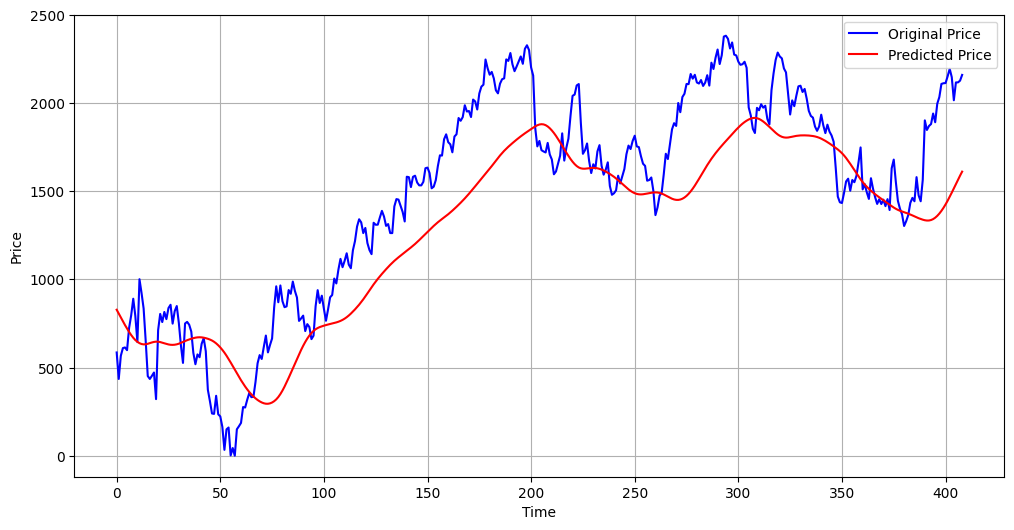

In [47]:
plt.figure(figsize = (12,6))
plt.plot(y_test, 'b', label = "Original Price")
plt.plot(y_pred, 'r', label = "Predicted Price")
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

# Model evaluation

Calculation of mean absolute error

In [48]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)
mae_percentage = (mae / np.mean(y_test)) * 100
print("Mean absolute error on test set: {:.2f}%".format(mae_percentage))

Mean absolute error on test set: 18.35%


Calculation of R2 score

In [49]:
from sklearn.metrics import r2_score

# Actual values
actual = y_test

# Predicted values
predicted = y_pred

# Calculate the R2 score
r2 = r2_score(actual, predicted)

print("R2 score:", r2)

R2 score: 0.694280426666565


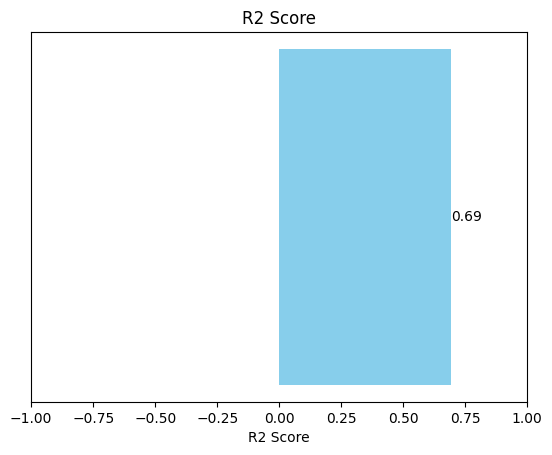

In [50]:
# Plotting the R2 score
fig, ax = plt.subplots()
ax.barh(0, r2, color='skyblue')
ax.set_xlim([-1, 1])
ax.set_yticks([])
ax.set_xlabel('R2 Score')
ax.set_title('R2 Score')

# Adding the R2 score value on the bar
ax.text(r2, 0, f'{r2:.2f}', va='center', color='black')

plt.show()

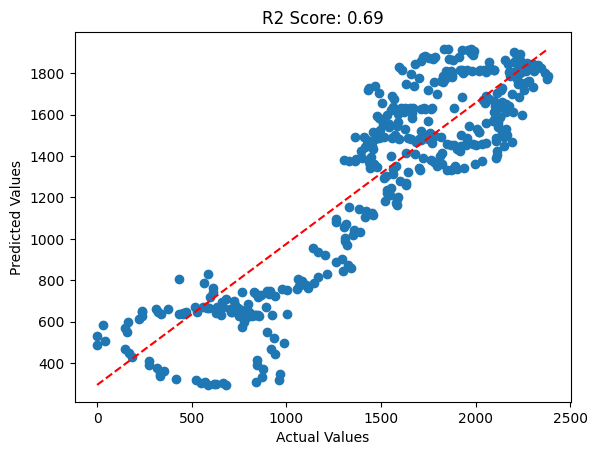

In [51]:
plt.scatter(actual, predicted)
plt.plot([min(actual), max(actual)], [min(predicted), max(predicted)], 'r--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title(f'R2 Score: {r2:.2f}')
plt.show()